<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day25_03_GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN을 이용한 MNIST 이미지 생성


In [0]:
import warnings
warnings.filterwarnings(action='ignore') 

In [0]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

W0729 09:18:29.451407 140199421482880 deprecation.py:323] From <ipython-input-5-4dcbd946c02b>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0729 09:18:29.453494 140199421482880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0729 09:18:29.455462 140199421482880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0729 09:18:29.713459 140199421482880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0729 09:18:29.716280 140199421482880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0729 09:18:29.767263 140199421482880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.0002
total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28*28
n_noise = 128

In [0]:
tf.reset_default_graph()

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [0]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

In [0]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

In [0]:
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output

In [0]:
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output

In [0]:
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [0]:
G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

In [0]:
loss_D = -tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
loss_G = -tf.reduce_mean(tf.log(D_gene))

In [0]:
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

In [0]:
train_D = tf.train.AdamOptimizer(learning_rate).minimize(loss_D,
    var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(loss_G,
    var_list=G_var_list)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch: 0000 D loss: 0.5694 G loss: 1.942
Epoch: 0001 D loss: 0.4568 G loss: 2.136
Epoch: 0002 D loss: 0.09839 G loss: 3.222
Epoch: 0003 D loss: 0.9418 G loss: 1.158
Epoch: 0004 D loss: 0.6973 G loss: 1.175
Epoch: 0005 D loss: 0.1839 G loss: 2.652
Epoch: 0006 D loss: 0.4504 G loss: 2.19
Epoch: 0007 D loss: 0.3617 G loss: 2.179
Epoch: 0008 D loss: 0.3115 G loss: 2.398
Epoch: 0009 D loss: 0.3806 G loss: 2.103
Epoch: 0010 D loss: 0.6064 G loss: 1.604
Epoch: 0011 D loss: 0.4621 G loss: 1.998
Epoch: 0012 D loss: 0.5151 G loss: 2.16
Epoch: 0013 D loss: 0.4694 G loss: 2.118
Epoch: 0014 D loss: 0.6497 G loss: 1.804
Epoch: 0015 D loss: 0.5628 G loss: 2.031
Epoch: 0016 D loss: 0.4951 G loss: 1.98
Epoch: 0017 D loss: 0.4914 G loss: 1.95
Epoch: 0018 D loss: 0.5803 G loss: 1.883
Epoch: 0019 D loss: 0.4939 G loss: 2.17
Epoch: 0020 D loss: 0.7591 G loss: 1.828
Epoch: 0021 D loss: 0.5043 G loss: 2.357
Epoch: 0022 D loss: 0.5915 G loss: 2.1
Epoch: 0023 D loss: 0.765 G loss: 1.789
Epoch: 0024 D loss: 0.6

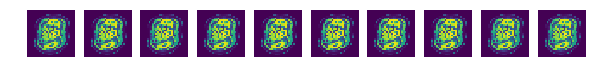

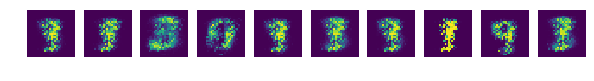

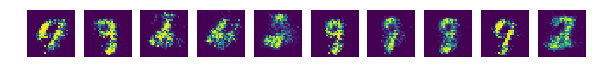

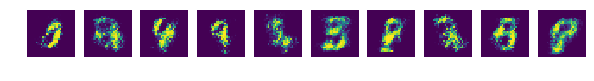

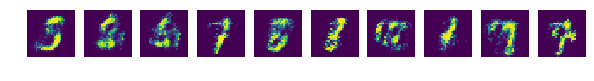

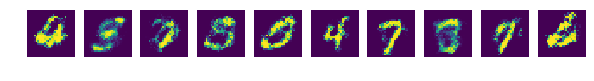

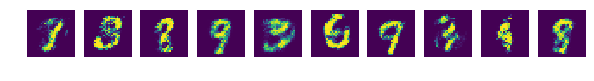

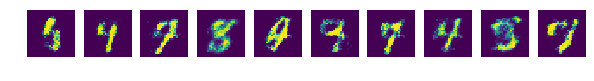

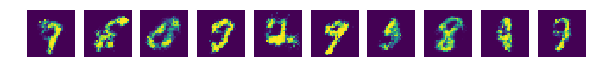

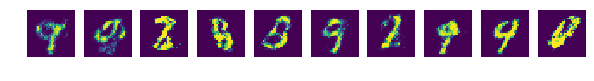

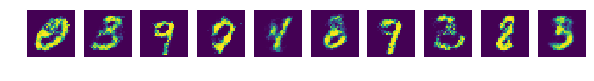

In [0]:
total_batch = int(mnist.train.num_examples / batch_size)
 
for epoch in range(total_epoch):
    loss_val_D, loss_val_G = 0, 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],
            feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
            feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
        'D loss: {:.4}'.format(loss_val_D),
        'G loss: {:.4}'.format(loss_val_G))

    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('{}.png'.format(str(epoch).zfill(3)),
            bbox_inches='tight')